====================================Visualize và đặt câu hỏi========================================

**Câu hỏi 1:Ứng với mỗi loại năng lượng, thì mức độ tiêu thụ của các nước nào là nhiều và thuộc top 10 trong thế kỷ 21?**
- Trả lời câu hỏi giúp chúng ta: 
    + Có cái nhìn tổng quan về mức độ tiêu thụ năng lượng của top 10 quốc gia đó và so sánh mức độ tiêu thụ của giữa các quốc gia đó.
    + Ứng với mỗi loại năng lượng thì ta thấy các quốc gia thuộc top 10 đó, ưu tiên sử dụng năng lượng hóa thạch hơn hay là năng lượng tái tạo nhiều hơn, hay là sử dụng cả hai mới đáp ứng đủ nhu cầu tiêu dùng. Từ đó cho thấy dự đoán được hướng đi của họ là ưu tiên sử dụng năng lượng sạch hay không?
    + Dự đoán về tình hình phát triển kinh tế (sử dụng năng lượng càng nhiều thì kinh tế có thể càng phát triển), dân số (dân số cao thì nhu cầu tiêu thụ năng lượng cũng cao).
- Cách để trả lời câu hỏi: Từ thuộc tính tiêu thụ năng lượng của từng loại năng lượng, chúng ta nhóm dataframe theo tên các quốc gia rồi sau đó chúng ta tính tổng tương ứng của từng quốc gia đó và lấy ra top10 nước sử dụng nhiều nhất để vẽ biểu đồ.

In [1]:
#import thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Data/data_processed.csv")
df.head(2000)

,Country,Year,Fossil fuels (TWh),Coal (TWh),Oil (TWh),Gas (TWh),Renewables (TWh),Hydropower (TWh),Solar (TWh),Wind (TWh)
0,Algeria,2000,300.0,5.64,103.13,191.01,0.0,0.0,0.0,0.0
1,Argentina,2000,595.0,7.51,264.94,322.97,86.0,84.0,0.0,0.0
2,Australia,2000,1253.0,591.66,455.98,205.55,52.0,49.0,0.0,0.0
3,Austria,2000,262.0,42.47,141.75,78.21,129.0,124.0,0.0,0.0
4,Azerbaijan,2000,128.0,0.00,74.69,52.83,5.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1812,United Kingdom,2022,1520.0,58.72,741.04,719.80,393.0,14.0,36.0,209.0
1813,United States,2022,21595.0,2741.22,10041.68,8812.12,3015.0,674.0,538.0,1145.0
1814,Uzbekistan,2022,572.0,28.68,60.05,483.18,14.0,14.0,0.0,0.0
1815,Venezuela,2022,440.0,0.42,147.72,291.78,174.0,174.0,0.0,0.0


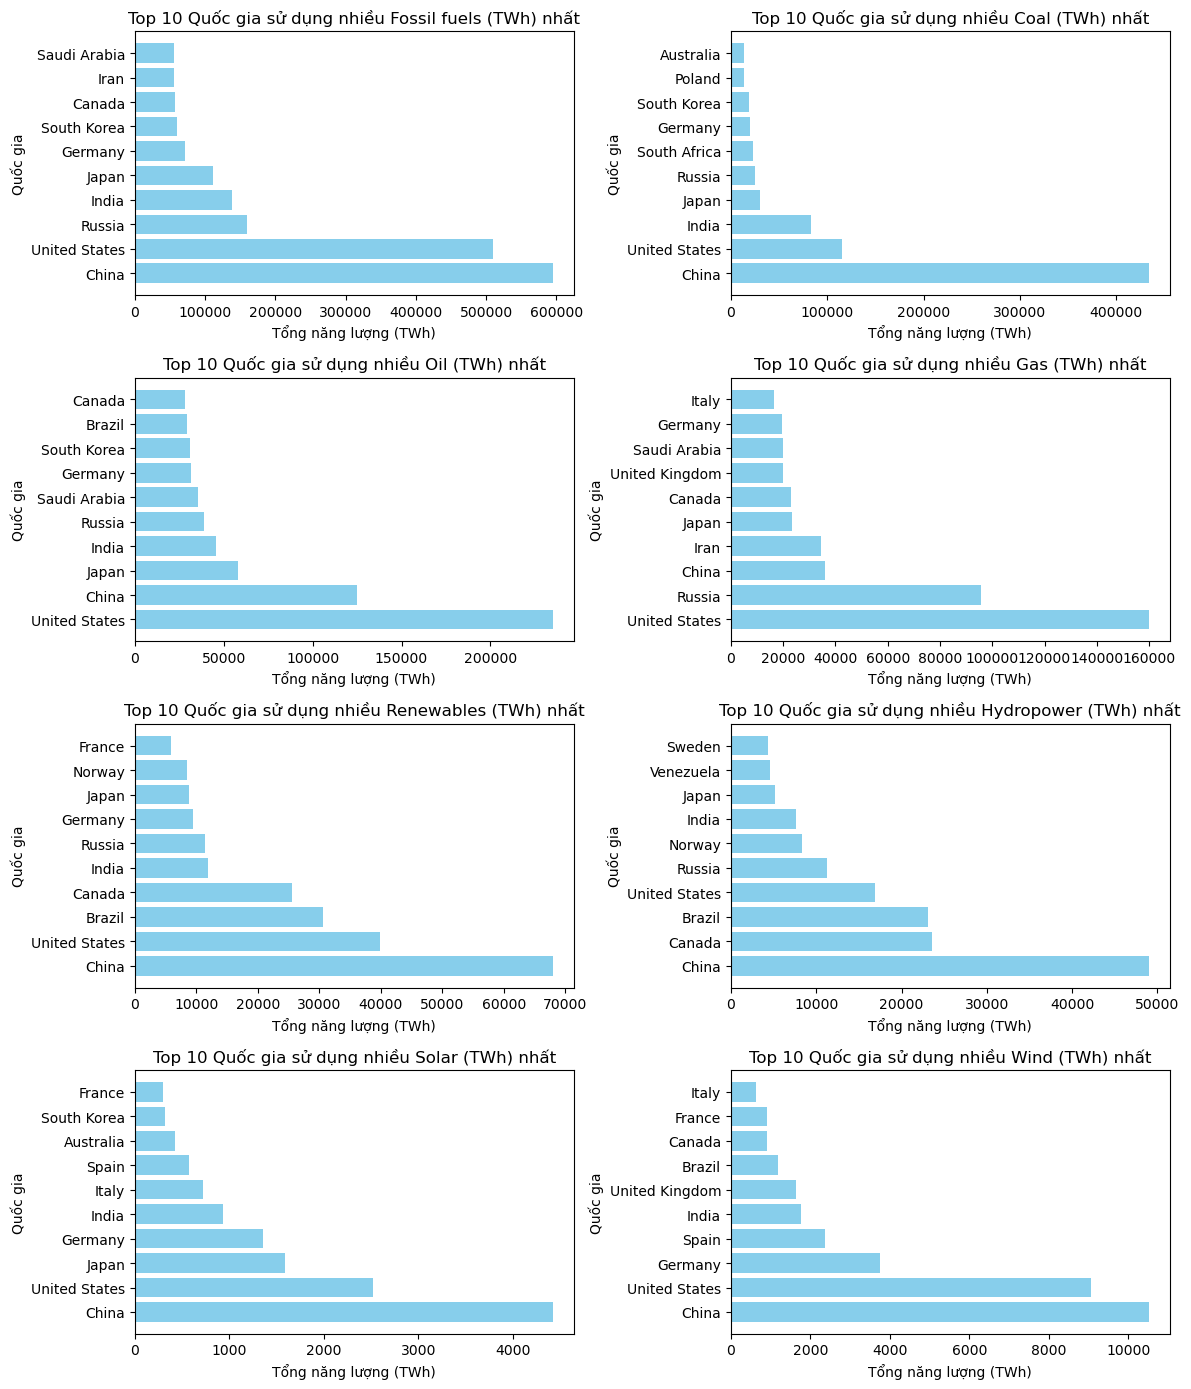

In [4]:
#Lấy các cột từ cột số 2 trở đi chừa cột tên nước và năm ra
columns = df.columns[2:]

num_plots = len(columns)
#chia thành 4 hàng, mỗi hàng hai đồ thị
num_rows = 4
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 14))

# Lặp qua từng loại năng lượng và vẽ biểu đồ cho top 10 quốc gia
for i, column in enumerate(columns):
    row = i // num_cols
    col = i % num_cols

    type_energy_by_country = df.groupby('Country')[column].sum()
    top_10_countries = type_energy_by_country.nlargest(10)

    axs[row, col].barh(top_10_countries.index, top_10_countries.values, color='skyblue')
    axs[row, col].set_title(f'Top 10 Quốc gia sử dụng nhiều {column} nhất')
    axs[row, col].set_xlabel('Tổng năng lượng (TWh)')
    axs[row, col].set_ylabel('Quốc gia')


plt.tight_layout()
plt.show()